<a href="https://colab.research.google.com/github/Grace-TA/AI2021/blob/main/10_MNIST/ColabMNIST20211020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome!! 歡迎加入人工智慧暨網站系統應用專業人才設計專班. 

讓我們好好來瞭解體驗與學習人工智慧與深度學習等相關的知識與應用! 

如果有任何學習上的問題都歡迎可以留言或是寫信給我們助教喔! 

助教的e-mail address是ta2021.vnu@gmail.com

Prepared by Horace Chen, Date: October 2021




Keras: Keras 是一個開源專案，透過 Python 實做的深度學習高階 API 函式庫。

https://blog.toright.com/posts/6809/keras-machine-learning-mnist.html



## 先來簡單快速的玩一下AI中的深度學習 (Deep Learning)!! 再回來學習Python, 才會比較知道為什麼要學Python!



## 步驟 1. 資料集準備 

In [ ]:
# 21005
try:
    %tensorflow_version 2.x #指定使用tensorflow 2.x
except Exception:
    pass
import tensorflow as tf # tf 1.X升級為2.X

In [ ]:
# 顯示TensorFlow版本
print(tf.__version__)

In [ ]:
# 21010: SOP步驟1.載入數據
import tensorflow as tf 
mnist = tf.keras.datasets.mnist # 載入數據
# 數據集的組成(x_train:訓練用data, y_train:訓練用label), (x_test:測試用data, y_test:測試用label)   
(x_train, y_train) ,  (x_test, y_test) = mnist.load_data() 
# 數據預處理,將data轉成0~1的小數(歸一化)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
!ls -lrt


In [ ]:
%cd 'sample_data'
!pwd

In [ ]:
!ls -lrt

In [ ]:
#21040 
print('訓練用圖片數量',len(x_train)) #training data 總共有60000張圖片
print('測試用圖片數量',len(x_test)) #test data 總共有10000張圖片
print('每張圖片解析度',x_train[0].shape) #每張圖片（0第一張）大小為 28x28 pixel

## 步驟 2. 建模訓練 / 訓練 

In [ ]:
# 21050 
%%time 
# 建立模型
model = tf.keras.models.Sequential([                
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])
# 編譯模型 compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
# 訓練模型 training
model.fit(x_train, y_train, epochs=20) #epochs=訓練回合數
# 儲存模型
model.save('Mnist_5.h5')

## 步驟 3. 預測未知 / 預測 

In [ ]:
# 21060
model.evaluate(x_test, y_test, verbose=2) #模型的準確率如何?

313/313 - 0s - loss: 0.0732 - accuracy: 0.9823


[0.07323486357927322, 0.9822999835014343]

模型預測數字= [0 0 0 0 1 0 0 0 0 0] 正確答案(label)= 4


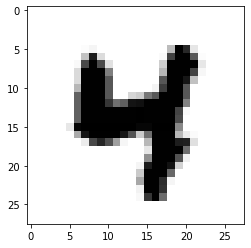

In [ ]:
# 21070 執行預測與顯示圖片
from matplotlib.pyplot import imshow
prediction = (model.predict(x_test) > 0.5).astype("int32")
test = 85
print('模型預測數字=',prediction[test],'正確答案(label)=',y_test[test])
imshow(x_test[test], cmap='gray_r')

模型預測數字= [0 0 1 0 0 0 0 0 0 0] 正確答案(label)= 2


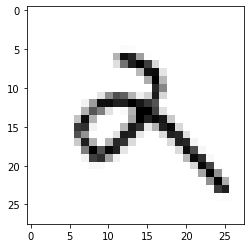

In [ ]:
# 1080 實作: 試試149 151 247 321 340 381, 預測不同的測試集圖片

from matplotlib.pyplot import imshow
# prediction = model.predict_classes(x_test) 
prediction = (model.predict(x_test) > 0.5).astype("int32") #針對測試集進行預測分類
test = 149
print('模型預測數字=',prediction[test],'正確答案(label)=',y_test[test])
imshow(x_test[test], cmap='gray_r')

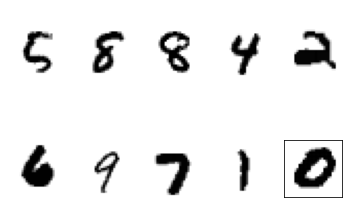

In [ ]:
import matplotlib.pyplot as plt
i=0
for i in range(2000,2009+1): #(起始,結束+1)
    x= i % 10 # 求餘數 x=0~9 顯示圖片位置序號
    plt.axis('off') #顯示xy軸 on/off
    ax=plt.subplot(2,5,x+1) #一次顯示多圖 (列,行,圖片位置序號 1開始)
    ax.imshow(x_train[i], cmap='gray_r') #colormap:None(預設), binary(二值化/非黑即白), gray_r, rainbow, seismic, summer
    title = str(i)+",l=" + str(y_train[i]) #圖片增加文字說明(序號,標籤)
    ax.set_title(title, fontsize=10,color='white')  #顯示(文字說明,字型大小,顏色)
    ax.set_xticks([]); ax.set_yticks([]) #不顯示xy軸刻度

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


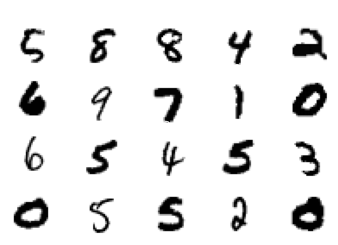

In [ ]:
import matplotlib.pyplot as plt
i=0
for i in range(1000,2009+1): #(起始,結束+1)
    x= i % 20 # 求餘數 x=0~9 顯示圖片位置序號
    plt.axis('off') #顯示xy軸 on/off
    ax=plt.subplot(4,5,x+1) #一次顯示多圖 (列,行,圖片位置序號 1開始)
    ax.imshow(x_train[i], cmap='gray_r') #colormap:None(預設), binary(二值化/非黑即白), gray_r, rainbow, seismic, summer
    title = str(i)+",l=" + str(y_train[i]) #圖片增加文字說明(序號,標籤)
    ax.set_title(title, fontsize=10,color='white')  #顯示(文字說明,字型大小,顏色)
    ax.set_xticks([]); ax.set_yticks([]) #不顯示xy軸刻度

In [ ]:
# My hand written

!pwd

/content


## 開始訓練神經網路以前，需要先建構網路，然後才開始訓練

> 上面這裡是神經網路的核心組成方式，我們在全連接層建立了兩層，由一個有 512 個神經元的網路架構連接到 10 個神經元的輸出層。輸出層採用 softmax 表示數字 0~9 的機率分配，這 10 個數字的總和將會是 1。以下將我們建立的網路進行 compile，這裡詳細的參數以後會介紹。

Reference: https://blog.toright.com/posts/6914/keras-mnist-helloworld.html

In [1]:
from keras.datasets import mnist
 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape


(60000, 28, 28)

In [4]:
len(train_labels)


60000

In [5]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape


(10000, 28, 28)

In [7]:
len(test_labels)


10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [17]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
# 以下將資料正規劃成為 0~1 的數值，變成 60000, 28x28 Shape 好送進上面定義的網路輸入層。
fix_train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
fix_test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
print(len(fix_train_images), len(fix_test_images))

60000 10000


## 由於我們使用的 categorical_crossentropy 損失函數，因此將標記資料進行格式轉換

In [19]:
fix_train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
fix_test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255


In [21]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical 
fix_train_labels = to_categorical(train_labels)
fix_test_labels = to_categorical(test_labels)

## 開始訓練 MNIST 類神經網路, 進行訓練模型，預計訓練的正確率應該會在 0.989 左右

In [ ]:
result = network.fit(
    fix_train_images,
    fix_train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(fix_test_images, fix_test_labels))

In [23]:
# 將訓練後的模型輸入測試資料進行評比，一般說這樣的正確率應該會在 0.977% 左右

test_loss, test_acc = network.evaluate(fix_test_images, fix_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)



313/313 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9819
test_loss: 0.09918143600225449
test_acc: 0.9818999767303467


## 過度擬合 (Over Fitting)
> 為什麽訓練時的正確率會高於驗證測試呢？在這樣數據中，由於模型訓練時對訓練資料造成些微的過度擬合 (Over Fitting) 。一般來說這樣的情況是正常的，未來我們可以透過參數的調整或其他方法提高正確性。

## 透過 Keras 圖表協助分析訓練過程
由於訓練 Model 時會進行好幾次的 Epoch，每一次 Epoch 都是對訓練資料集進行一輪完整的訓練，妥善觀察每一次 Epoch 的數據是很重要地。我們可以透過 matplotlib 函式庫繪製圖表，幫我們進行分析。

以下方式可以繪製訓練過程 Loss Function 對應的損失分數。Validation loss 不一定會跟隨 Training loss 一起降低，當 Model Over Fitting Train Data 時，就會發生 Validation loss 上升的情況。

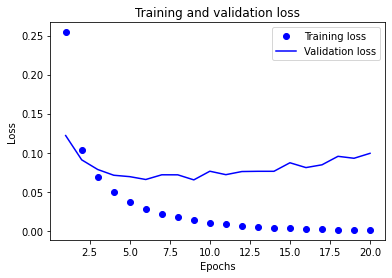

In [24]:
history_dict = result.history
 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
 
import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

> 可以看到差不多在第8次 Epochs 就得到最佳解。此外，我們也可以透過以下程式可以繪製訓練過程的正確率變化。訓練的過程中，當 Accuracy 後期並有沒太大的變化，表示 Model 很快就在假設空間裡進行不錯的收斂。

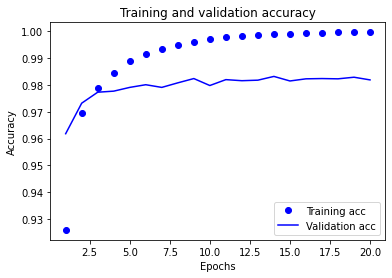

In [25]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.show()